# Investigating Olympic History Dataset

Here we will be using 120 years of Olympic history dataset from kaggle which gives us all the basic information about athletes and results including all the Games from Athens 1896 to Rio 2016.
## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Here we will be using 120 years of Olympic history dataset from kaggle which gives us all the basic information about athletes and results including all the Games from Athens 1896 to Rio 2016.

The given data set gives us all the information about the athletes, games, teams in Olympics

In this report we will mainly concentrate on the performance of team India and Indian atheletes in Olympics.

In [1]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

% matplotlib inline
warnings.filterwarnings('ignore')


<a id='wrangling'></a>
## Data Wrangling


In [2]:
#reading the data
df1 = pd.read_csv('athlete_events.csv')
#reading the regions data
df2 = pd.read_csv('noc_regions.csv')

In [3]:
#view data
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
#view data
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
# Lets change all the columns names to lower case for consistancy and ease 
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()

In [6]:
# lets join the two datasets on noc-National Olympic Committee 3-letter code
df = pd.merge(df1,df2, on = 'noc', how = 'left')
df.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [7]:
#lets get the data related to India
df_India = df[df.noc == 'IND']
#reset the index
df_India.reset_index(inplace = True)
#dropping index and notes column as we don't need them
df_India.drop(['index','notes'],axis = 1, inplace = True)
#view India dataset
df_India.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region
0,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India
1,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India
2,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India
3,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India
4,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India


In [8]:
#let us check the team and region unique values
df_India.region.unique()

array(['India'], dtype=object)

In [9]:
#lets check the dataset 
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 16 columns):
id        1408 non-null int64
name      1408 non-null object
sex       1408 non-null object
age       1258 non-null float64
height    891 non-null float64
weight    869 non-null float64
team      1408 non-null object
noc       1408 non-null object
games     1408 non-null object
year      1408 non-null int64
season    1408 non-null object
city      1408 non-null object
sport     1408 non-null object
event     1408 non-null object
medal     197 non-null object
region    1408 non-null object
dtypes: float64(3), int64(2), object(11)
memory usage: 176.1+ KB


In [10]:
# Lets get all the records where we won the medals
df_India.medal.count()

197

In [11]:
#lets get all the wins into one dataset
wins = df_India[df_India.medal.notnull()]
#to View data wins.head()

In [12]:
wins_male = wins[wins.sex == 'M']
wins_male.shape[0]


192

In [13]:
wins_female = wins[wins.sex == 'F']
wins_female.shape[0]

5

<a id='eda'></a>
## Exploratory Data Analysis

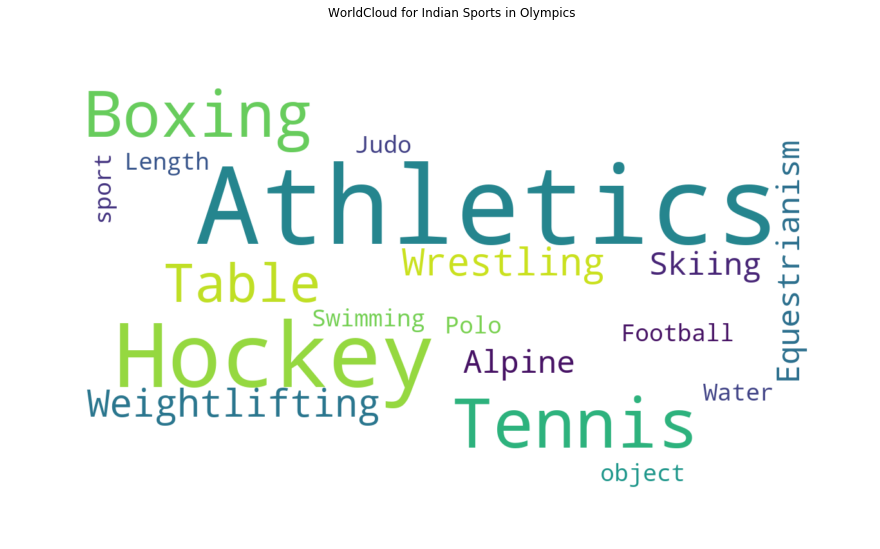

In [14]:
#Lets see what sports has India been representing in Olympics
#creating a mask
mask = np.array(Image.open('flag.jpg'))
#text for word cloud
text = str(df_India.sport)
#creating stopwords
stopwords = set(STOPWORDS)
stopwords.update(['dtype', 'Name'])
#generating wordcloud
wordcloud = WordCloud(mask = mask, stopwords=stopwords, max_words = 27, mode = 'RGBA', background_color="white").generate(text)
# Display the generated image
plt.figure(figsize = (15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WorldCloud for Indian Sports in Olympics')
plt.show()

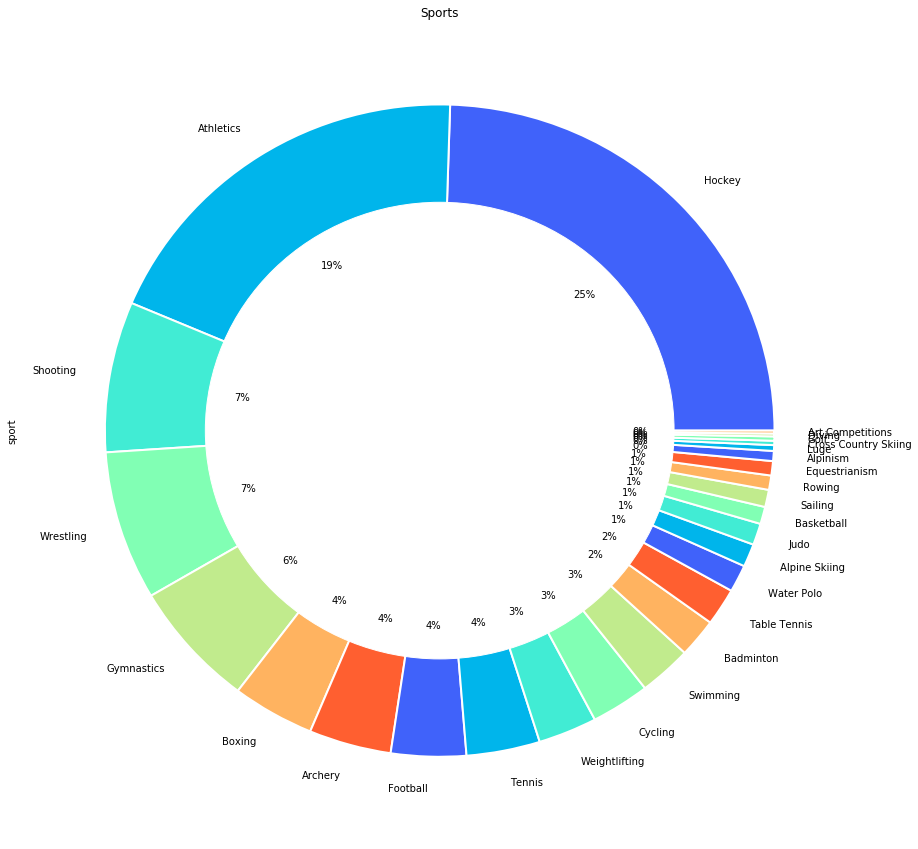

In [15]:
#Now lets see what sport we have been playing the most in Olympics
plt.figure(figsize=(15,15))
df_India['sport'].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",7),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title('Sports')
plt.show()

Text(0.5,1,'Total Number of athlets over the period of time')

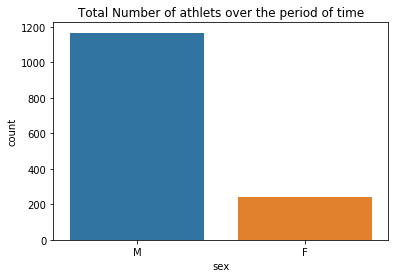

In [16]:
#Let us see how many Indian athlets have participated in Olympics (total)
sns.countplot(df_India.sex)
plt.title('Total Number of athlets over the period of time')


Text(0.5,1,'Number of athlets over the period of time')

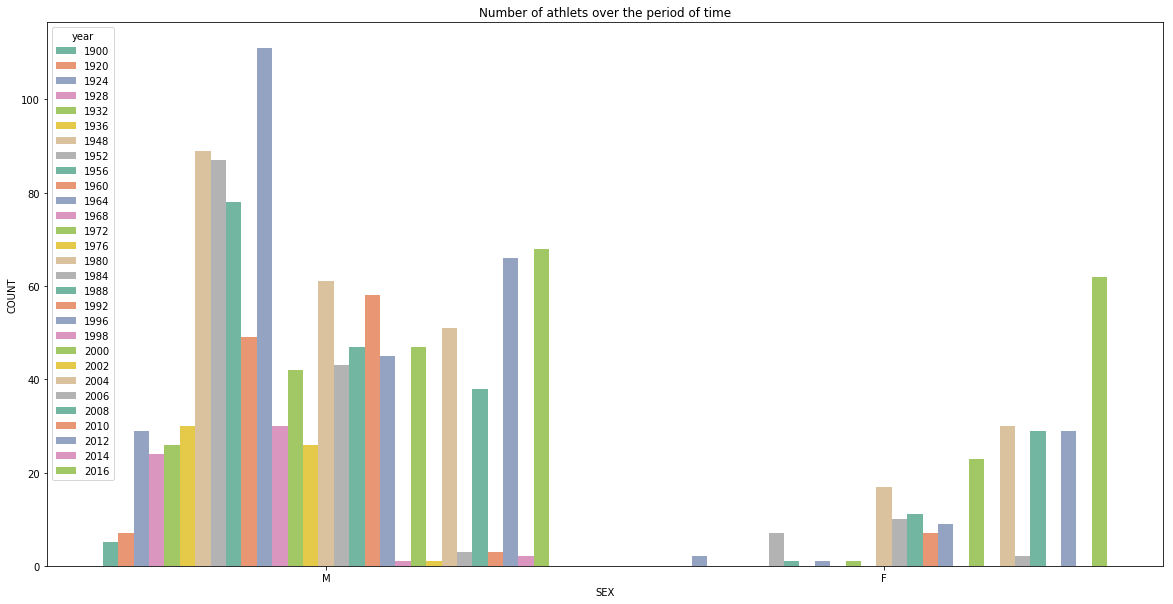

In [17]:
#lets us now see how many male and female have participated from Inida over the period of time
plt.figure(figsize=(20, 10))
ax= sns.countplot(x='sex', hue='year', data= df_India, palette = 'Set2');
plt.xlabel("SEX")
plt.ylabel("COUNT")
plt.title('Number of athlets over the period of time')

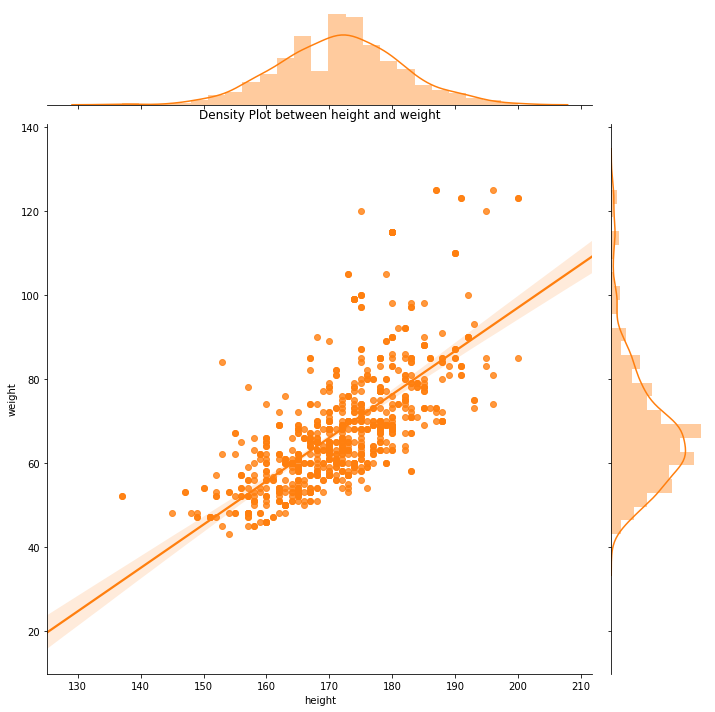

In [18]:
#Lets see the plot between the density of height and weight of the athlets
ax = sns.jointplot(df_India['height'],df_India['weight'],kind = 'reg', color='C1',size = 10)
plt.title('Density Plot between height and weight')
plt.show()

**Lets now see the performance of India based on the number of medals won.**

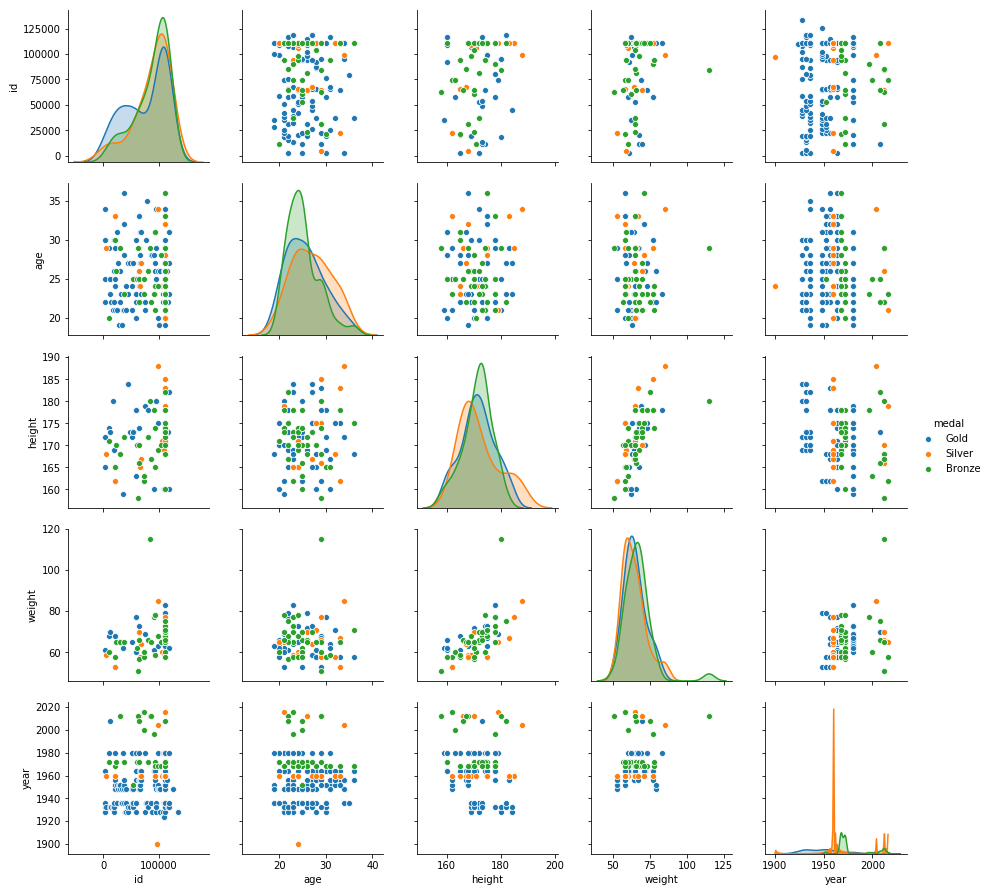

In [19]:
#lets see the relation of wins to other factors
sns.pairplot(wins, hue="medal")

Text(0.5,1,'Number of medals based on sport')

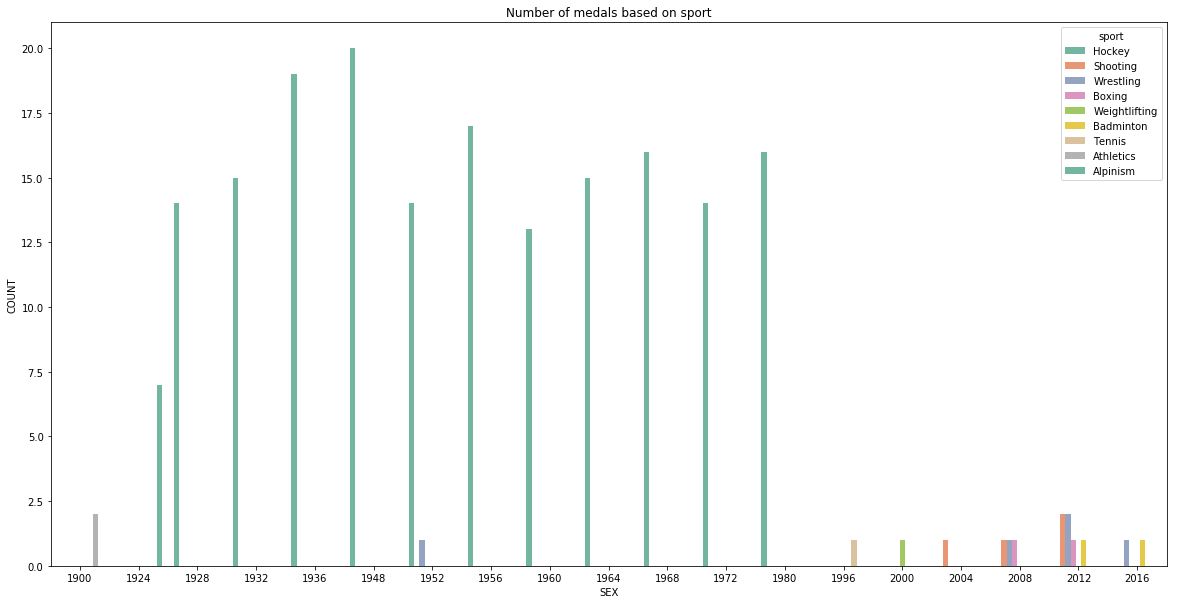

In [20]:
#lets see how many medals we won by sports
plt.figure(figsize=(20, 10))
ax= sns.countplot(x='year', hue='sport', data= wins, palette = 'Set2');
plt.xlabel("SEX")
plt.ylabel("COUNT")
plt.title('Number of medals based on sport')

Text(0.5,0,'YEAR')

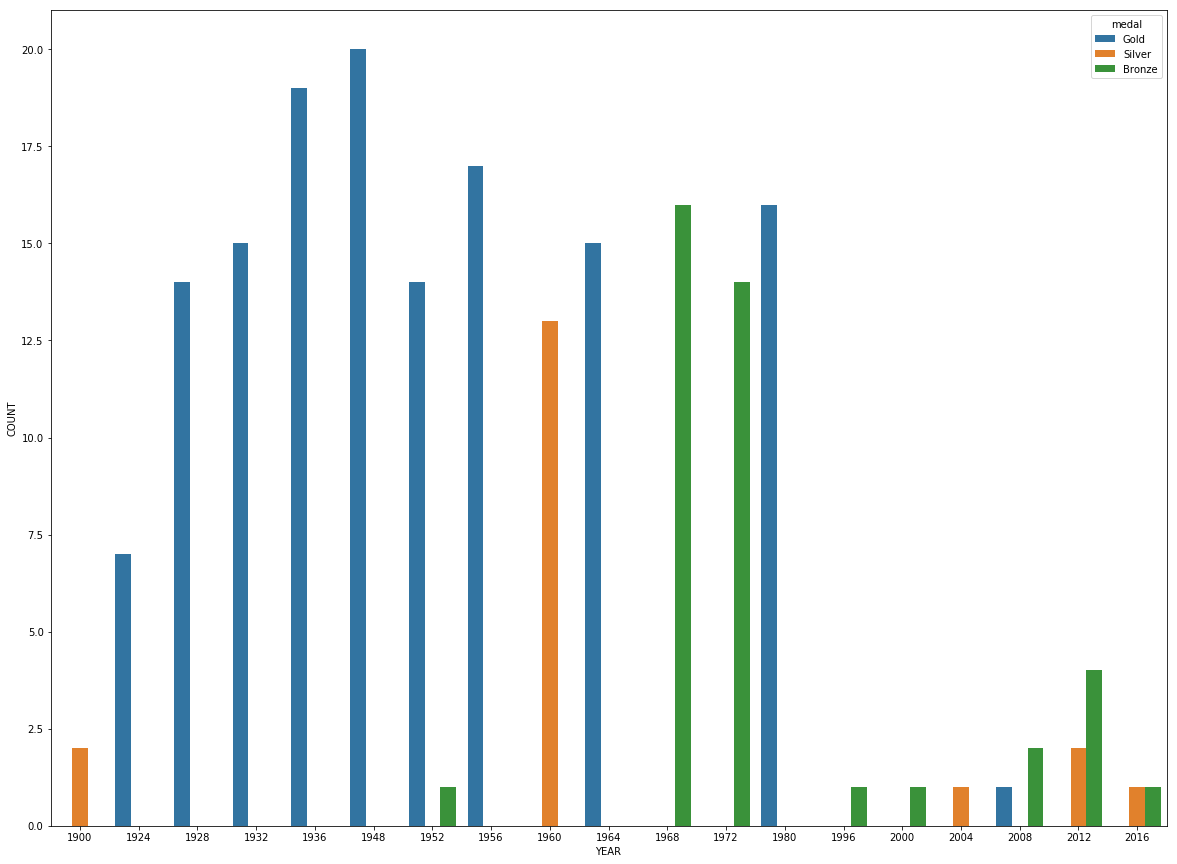

In [21]:
#Number of medals over the year(gold,silver,bronze)
plt.figure(figsize=(20, 15))
ax = sns.countplot(x = 'year', hue = 'medal', data = wins)
plt.ylabel('COUNT')
plt.xlabel('YEAR')


In [22]:
#lets get the subset of the data for number of wins
wins_count = wins.groupby('year').count().medal
#save the file to csv and recall call the data to set the index and header properly. We need to do this because 
# we are using groupby and count. This doesn't set the index and header properly
wins_count = wins_count.to_csv('wins_count.csv', index = True)
# groupby and count also doesn't give proper header so keep header as none
wins_count = pd.read_csv('wins_count.csv', header = None)
# set the header with naming columns
new_labels = ['year','sum_win_count']
wins_count.columns = new_labels
#view data
wins_count.head()

,year,sum_win_count
0,1900,2
1,1924,7
2,1928,14
3,1932,15
4,1936,19


Text(0.5,1,'Performance of India based on number of wins over the period of time')

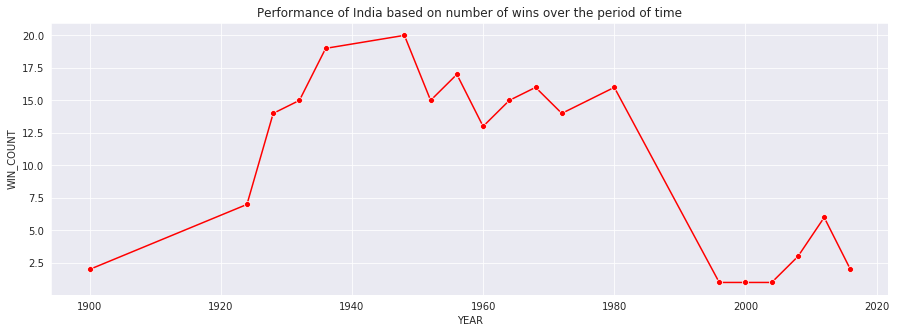

In [23]:
plt.figure(figsize = (15,5))
sns.set_style("darkgrid")
ax = sns.lineplot(x = 'year', y = 'sum_win_count', marker = 'o', data = wins_count, color = 'r')
plt.ylabel('WIN_COUNT')
plt.xlabel('YEAR')
plt.title('Performance of India based on number of wins over the period of time')


Text(0.5,1,'Medals trend over age and time')

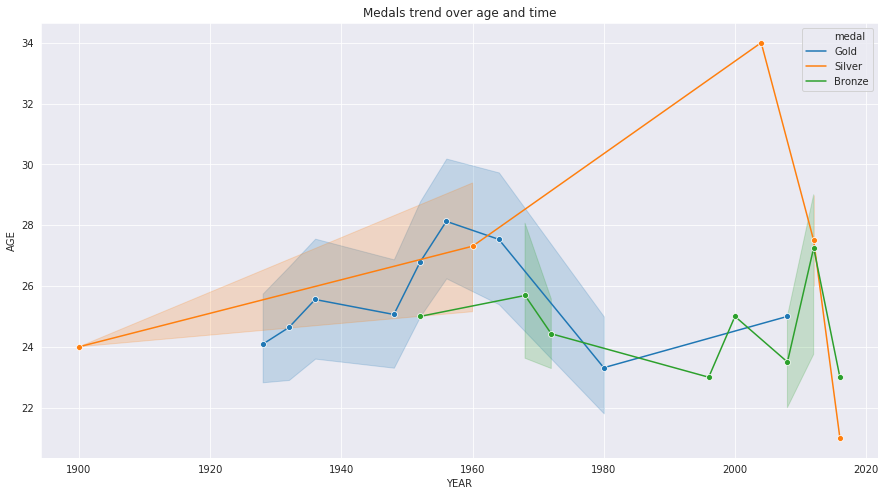

In [24]:
#Lets see the trend of medals over years based on age
plt.figure(figsize = (15,8))
ax = sns.lineplot(x = wins.year, y = wins.age , hue = 'medal', marker = 'o', data = wins, color = 'RGBA')
plt.ylabel('AGE')
plt.xlabel('YEAR')
plt.title('Medals trend over age and time')

Text(0.5,1,'Medals trend over weight and time')

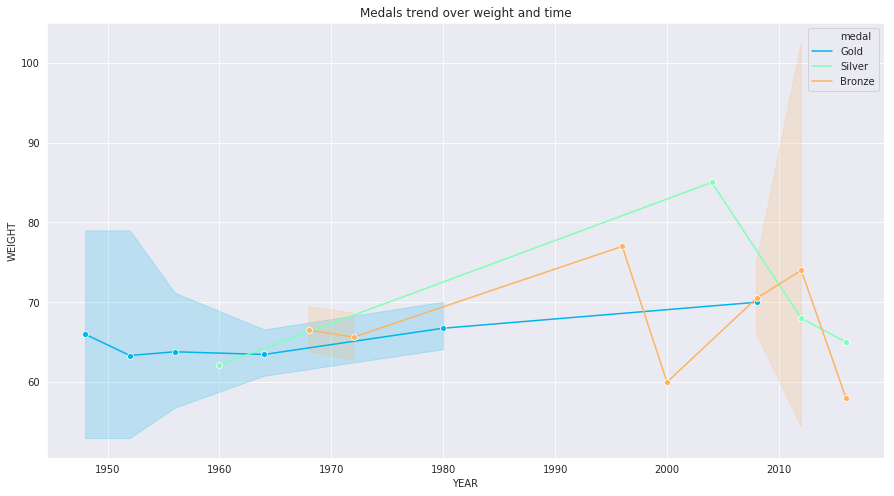

In [25]:
#Lets see the trend of medals over years based on weight
plt.figure(figsize = (15,8))
ax = sns.lineplot(x = wins.year, y = wins.weight , hue = 'medal', marker = 'o', data = wins, palette = 'rainbow')
plt.ylabel('WEIGHT')
plt.xlabel('YEAR')
plt.title('Medals trend over weight and time')

Text(0.5,1,'Medals trend over height and time')

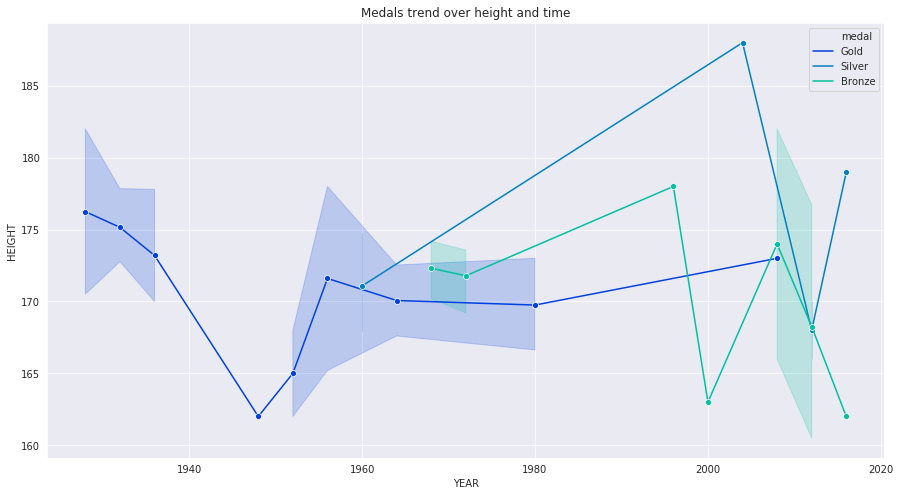

In [26]:
#Lets see the trend of medals over years based on height
plt.figure(figsize = (15,8))
ax = sns.lineplot(x = wins.year, y = wins.height , hue = 'medal', marker = 'o', data = wins, palette = 'winter')
plt.ylabel('HEIGHT')
plt.xlabel('YEAR')
plt.title('Medals trend over height and time')

<a id='conclusions'></a>
## Conclusions and Limitations

In this report, we have performed a basic analysis of Olympic games and have mainly concentrated on the performance of India in the past 120 years. Based on the analysis and visualization we can see that India has been participating in Hockey, Athletics, Shooting, Wrestling, Gymnastics more than any other sports. We can also see that the male athletes are much more compared to female athletes but, the participation of female athletes have been increasing in the past few games which is a good growth. When coming to the number of medals won Hockey has played a major role. Over 1920's to 1980's Indian Hockey has won a number of gold, silver and bronze medals (predominantly Gold). The overall performance of the Indian team in Olympics has been very good in the time period 1920's to 1980's compared to other times. 

The analysis and visualization provided here are purely based on given data.